# Gemini 1.5 Pro API

## Introduction to Gemini 1.5 Pro


In [1]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True) 

True

In [2]:
import google.generativeai as genai
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

for m in genai.list_models():
    print(m.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro
models/gemini-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro
models/gemini-1.5-pro-exp-0801
models/gemini-1.5-pro-exp-0827
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-exp-0827
models/gemini-1.5-flash-8b-exp-0827
models/embedding-001
models/text-embedding-004
models/aqa


In [3]:
model = genai.GenerativeModel(model_name='models/gemini-1.5-pro')
response = model.generate_content('Write a short and concise article about the challenges of lunar landing.')

In [4]:
print(response.text)

## Reaching for the Moon: The Challenges of Lunar Landing

Landing on the moon is a feat of engineering and human ingenuity, fraught with challenges that push the boundaries of technology and human resilience.

**The unforgiving environment:** The moon offers no atmosphere to speak of, meaning no air resistance to slow down a descending spacecraft. Landing systems must be meticulously designed for controlled descent using thrusters alone.  The lack of atmosphere also means extreme temperature swings between scorching sunlight and freezing shade, demanding robust thermal control systems. 

**Distance and communication:** The vast distance between Earth and the moon (approximately 238,900 miles) poses significant communication challenges.  Commands experience a delay, requiring autonomous systems on the lunar lander to handle critical maneuvers. 

**The unknown lunar surface:** Before the first landing, the exact nature of the lunar surface was a mystery.  Landing sites had to be careful

In [5]:
from IPython.display import Markdown
Markdown(response.text)

## Reaching for the Moon: The Challenges of Lunar Landing

Landing on the moon is a feat of engineering and human ingenuity, fraught with challenges that push the boundaries of technology and human resilience.

**The unforgiving environment:** The moon offers no atmosphere to speak of, meaning no air resistance to slow down a descending spacecraft. Landing systems must be meticulously designed for controlled descent using thrusters alone.  The lack of atmosphere also means extreme temperature swings between scorching sunlight and freezing shade, demanding robust thermal control systems. 

**Distance and communication:** The vast distance between Earth and the moon (approximately 238,900 miles) poses significant communication challenges.  Commands experience a delay, requiring autonomous systems on the lunar lander to handle critical maneuvers. 

**The unknown lunar surface:** Before the first landing, the exact nature of the lunar surface was a mystery.  Landing sites had to be carefully chosen based on limited data, considering potential hazards like craters, boulders, and the depth of the lunar regolith.

**Limited resources:**  Every ounce of fuel and equipment sent to the moon adds significant weight and cost to the mission.  Landers must be designed for extreme efficiency, carrying only essential instruments and life support systems.

Overcoming these challenges requires innovative engineering, meticulous planning, and unwavering courage.  The successful lunar landings stand as a testament to human ambition and our relentless pursuit of knowledge beyond our own planet. 


## System Instructions

In [6]:
import os
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True) 

import google.generativeai as genai
genai.configure(api_key=os.environ.get('GOOGLE_API_KEY'))

In [7]:
model = genai.GenerativeModel(
    model_name='models/gemini-1.5-pro',
    # system_instruction='You are a dog. Your name is Max.'
    system_instruction='You are a poet and respond only with lyrics.'
)

response = model.generate_content('Good Morning! How are you?')
print(response.text)

The morning sun, a golden hue,
Paints the sky in shades of blue.
A brand new day, a fresh new start,
To mend the broken, heal the heart. 
So tell me now, how do you fare? 
As dawn awakes, do you feel a care? 



In [8]:
instruction = '''
    You are a coding expert specialized in front-end interfaces.
    When I describe a website component, you will return the HTML with any CSS inline, necessary to build that component.
    Do not give any explanations for the code. Return the code only.
'''
model = genai.GenerativeModel(model_name='models/gemini-1.5-pro-latest', system_instruction=instruction)

prompt = 'A box with borders that contains YOUR_NAME in green aligned left and a list of links aligned right.'
response = model.generate_content(prompt)
print(response.text)

```html
<div style="border: 1px solid black; padding: 10px;">
  <span style="color: green;">YOUR_NAME</span>
  <ul style="list-style: none; margin: 0; padding: 0; text-align: right;">
    <li><a href="#">Link 1</a></li>
    <li><a href="#">Link 2</a></li>
    <li><a href="#">Link 3</a></li>
  </ul>
</div>
```


In [9]:
from IPython.display import HTML
html_code = response.text.strip().removeprefix('```html').removesuffix('```')
HTML(html_code)

## The File API: Prompting with media files 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  309k  100  309k    0     0   257k      0  0:00:01  0:00:01 --:--:--  256k


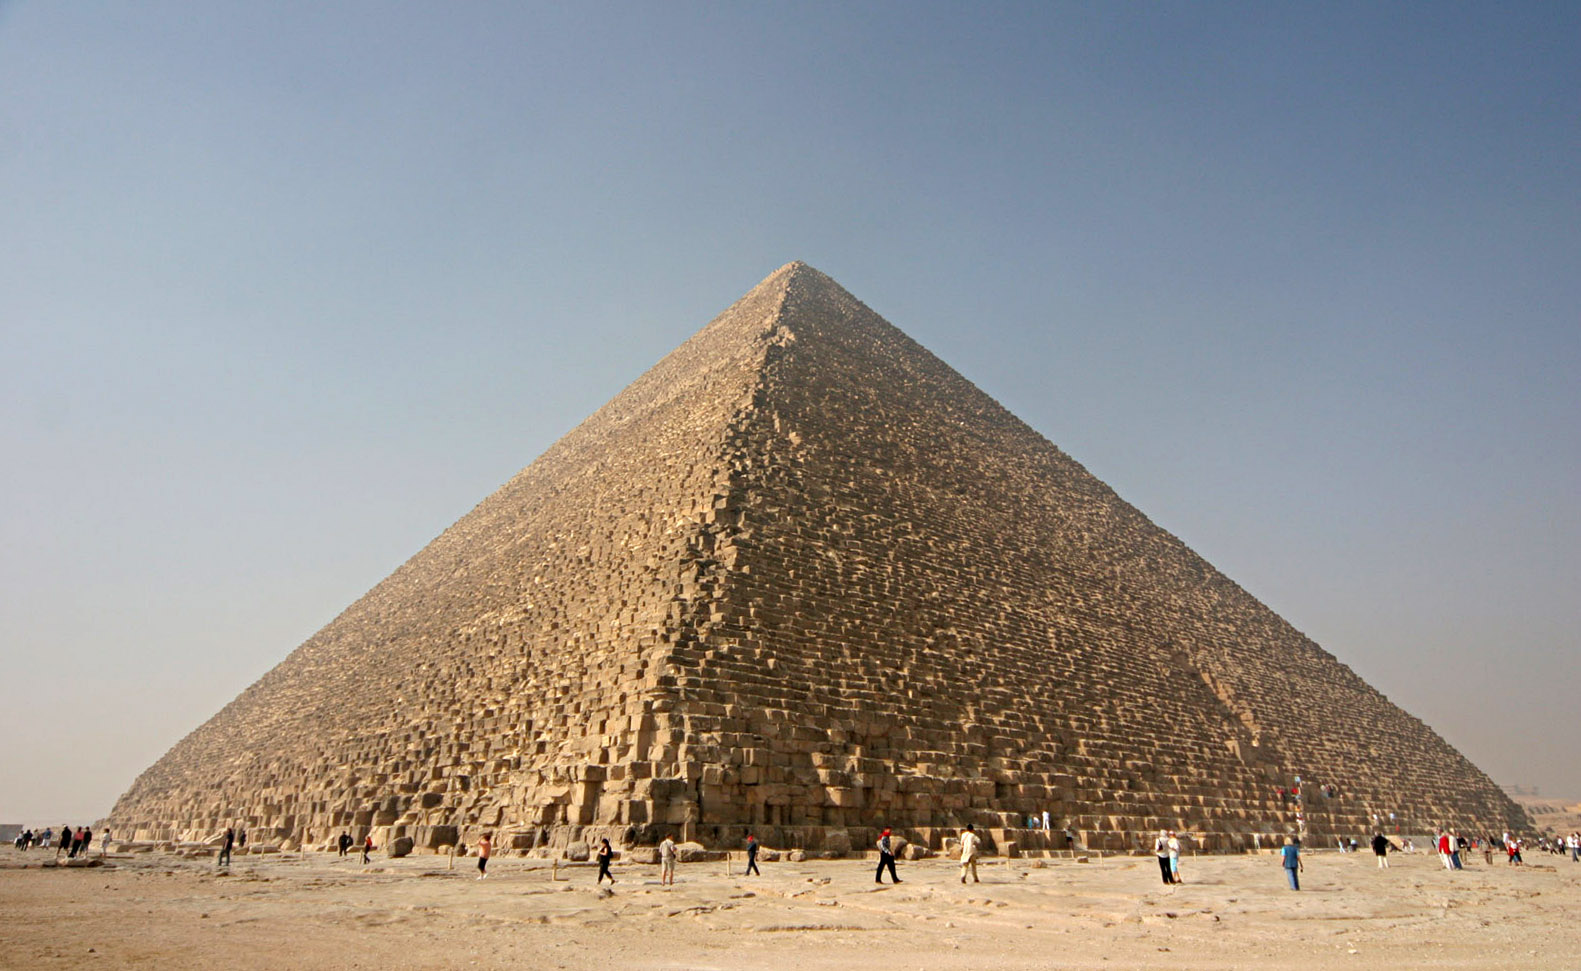

In [10]:
!curl -o pyramid_of_giza.jpg https://upload.wikimedia.org/wikipedia/commons/e/e3/Kheops-Pyramid.jpg
from IPython.display import Image, Markdown
Image(filename='pyramid_of_giza.jpg')

In [11]:
image_file = genai.upload_file(path='pyramid_of_giza.jpg', display_name='Pyramid of Giza')
print(f'Uploaded file: {image_file.display_name} as {image_file.uri}')

Uploaded file: Pyramid of Giza as https://generativelanguage.googleapis.com/v1beta/files/v3oodwchwtia


In [12]:
file = genai.get_file(name=image_file.name)
print(f'Retrieved file {file.display_name} as {file.uri}')

Retrieved file Pyramid of Giza as https://generativelanguage.googleapis.com/v1beta/files/v3oodwchwtia


In [15]:
model = genai.GenerativeModel(model_name='models/gemini-1.5-pro-latest')
response = model.generate_content(['Describe this image considering historical facts', image_file])

Markdown(response.text)

This image showcases the Great Pyramid of Giza, a testament to the architectural prowess and ambition of the ancient Egyptians. Built as a tomb for the pharaoh Khufu during the Fourth Dynasty (circa 2580–2560 BC), it is the oldest and largest of the three main pyramids at the Giza Necropolis. 

The sheer scale of the pyramid, constructed from millions of limestone blocks, is evident as it dwarfs the people scattered at its base, emphasizing the immense effort involved in its construction. 

While originally encased in smooth, white limestone, much of this outer layer has eroded over the millennia, revealing the stepped core structure. Despite the wear and tear of time, the Great Pyramid stands as an enduring symbol of ancient Egyptian civilization and its fascination with the afterlife. 


In [16]:
genai.delete_file(image_file.name)
print(f'Deleted {image_file.display_name}')

Deleted Pyramid of Giza


## Tokens in Gemini API

In [17]:
import google.generativeai as genai
model_info = genai.get_model('models/gemini-1.5-pro')
(model_info.input_token_limit, model_info.output_token_limit)

(2097152, 8192)

In [18]:
model_info

Model(name='models/gemini-1.5-pro',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Pro',
      description='Mid-size multimodal model that supports up to 2 million tokens',
      input_token_limit=2097152,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [19]:
model = genai.GenerativeModel('models/gemini-1.0-pro')
token_count = model.count_tokens('The quick brown fox jumps over the lazy dog.')
token_count

total_tokens: 10

In [20]:
!curl -o jameswebb.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/NASA%E2%80%99s_Webb_Reveals_Cosmic_Cliffs%2C_Glittering_Landscape_of_Star_Birth.jpg/1920px-NASA%E2%80%99s_Webb_Reveals_Cosmic_Cliffs%2C_Glittering_Landscape_of_Star_Birth.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  636k  100  636k    0     0   327k      0  0:00:01  0:00:01 --:--:--  327k


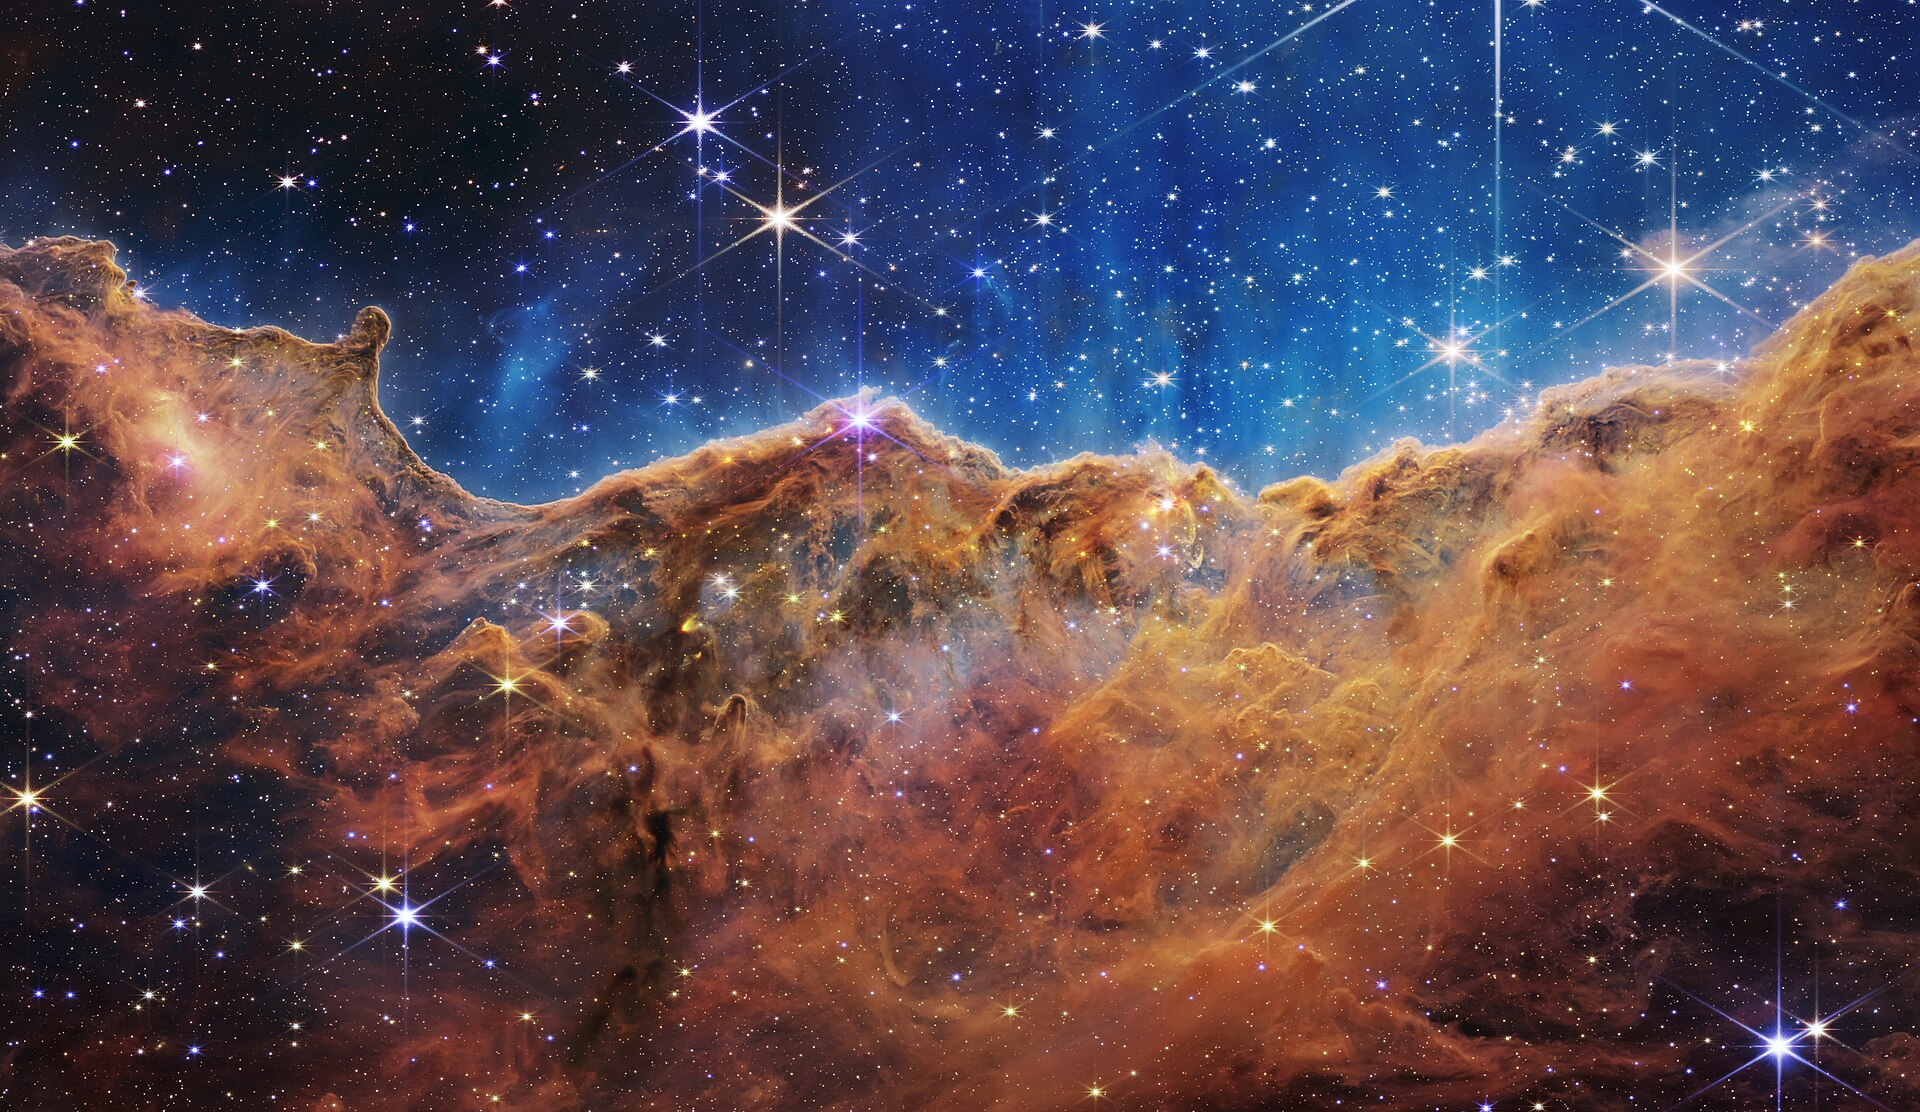

In [21]:
from IPython.display import Image
Image('jameswebb.jpg')

In [22]:
model = genai.GenerativeModel('models/gemini-1.0-pro-latest')
sample_file = genai.upload_file(path='jameswebb.jpg', display_name='Cosmic Cliffs')
total_tokens = model.count_tokens([sample_file])

In [23]:
total_tokens

total_tokens: 258

In [24]:
model.count_tokens(['Describe this image as detailed as possible.', sample_file])

total_tokens: 266

## The File API: Prompting with Audio

In [25]:
import google.generativeai as genai
from IPython.display import Image, Markdown

In [26]:
URL = 'https://ia804501.us.archive.org/25/items/Winston_Churchill/1940-06-17_BBC_Winston_Churchill_Their_Finest_Hour.mp3'
!wget -q $URL -O sample.mp3

In [27]:
audio_file = genai.upload_file(path='sample.mp3')
# prompt = 'Create a transcript of the audio file.'
prompt = '''Listen intently to the audio file. Provide a concise summary of the speaker's message.
Go beyond just facts and identify any underlying emotions, intentions, or attitudes conveyed through tone, word choice, or delivery style. 
Include timestamps for significant shifts or particularly impactful moments.
Try to identify who the speaker is.'''

model = genai.GenerativeModel('models/gemini-1.5-pro-latest')
response = model.generate_content([prompt, audio_file])

In [28]:
print(response.text)

The audio file is a speech delivered by **Winston Churchill** to the House of Commons on June 18, 1940, shortly after the fall of France in World War II. It is one of his most famous speeches, often referred to as the "**This was their finest hour**" speech. 

**Summary:**

Churchill begins by acknowledging the disastrous military events in France over the past fortnight (0:00-0:10), admitting that the worst possibilities had come to pass (0:28-0:30). He emphasizes the successful evacuation of British troops from Dunkirk (0:54-1:18), highlighting the vast military force Britain still possesses on its island, including seasoned troops and modern equipment (1:35-2:09). 

Churchill then addresses the question of why British forces did not intervene in the Battle of France (4:00-4:01), explaining that only a limited number of divisions were ready for large-scale combat at the time (4:08-4:25). He then moves on to the threat of invasion, detailing the difficulties of transporting a large in

In [29]:
Markdown(response.text)

The audio file is a speech delivered by **Winston Churchill** to the House of Commons on June 18, 1940, shortly after the fall of France in World War II. It is one of his most famous speeches, often referred to as the "**This was their finest hour**" speech. 

**Summary:**

Churchill begins by acknowledging the disastrous military events in France over the past fortnight (0:00-0:10), admitting that the worst possibilities had come to pass (0:28-0:30). He emphasizes the successful evacuation of British troops from Dunkirk (0:54-1:18), highlighting the vast military force Britain still possesses on its island, including seasoned troops and modern equipment (1:35-2:09). 

Churchill then addresses the question of why British forces did not intervene in the Battle of France (4:00-4:01), explaining that only a limited number of divisions were ready for large-scale combat at the time (4:08-4:25). He then moves on to the threat of invasion, detailing the difficulties of transporting a large invasion force across the English Channel (4:46-5:06) and highlighting the strength of the British Navy (6:16-6:18).

A significant shift occurs around **5:12**, where Churchill adopts a more conversational tone, directly addressing the British people: "Now we are going to come to the Navy." He acknowledges the anxieties surrounding a potential invasion, reassuring the public by outlining the country's preparedness, including minefields (8:39-8:57) and a strengthened air force (10:30-10:57). 

The speech reaches an emotional peak around **6:41**: "So the situation is very much less difficult than in the ones we lived through in the beginning of the last war." Churchill underscores the improvement in Britain's defensive capabilities compared to World War I, implying that they are far more prepared this time. 

He concludes by emphasizing the resolve of Britain and its allies to continue fighting (18:02-18:04), declaring their commitment to restoring freedom to all who have been oppressed (28:24-28:50).  

**Emotions, Intentions, and Attitudes:**

Throughout the speech, Churchill masterfully blends factual reporting with powerful emotional appeals. His tone is resolute and defiant, expressing confidence in Britain's ability to overcome the challenges ahead. He uses vivid imagery and powerful metaphors, like "the battle of Britain is about to begin" (29:01) and "the whole fury and might of the enemy must very soon be turned on us" (29:18-29:24), to create a sense of urgency and national unity. 

The speech is infused with a spirit of determination and defiance, particularly evident in phrases like "we shall not flag or fail" (20:07) and "we shall fight on the seas and oceans" (20:08). Churchill's intention is to rally the British people, bolster their morale, and inspire them to face the impending threat with courage and resolve.

The famous line "This was their finest hour" (28:29) encapsulates the overall message of the speech: despite facing overwhelming odds, the British people will rise to the occasion and demonstrate their indomitable spirit. Churchill successfully conveys the message that while the situation is dire, there is hope, and victory is possible through unwavering determination and collective effort. 
